In [44]:
import pandas as pd
import numpy as np


pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

from sklearn.model_selection import train_test_split


In [45]:
credit = pd.read_csv('my-dataset/credit_train.csv')
credit.head()


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [46]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [47]:
credit.drop(credit.tail(514).index, inplace = True)
#Xoa 514 dong cuoi toan cac gia tri null

In [48]:
credit.drop(labels = ['Loan ID', 'Customer ID'], axis = 1, inplace=True)
#Xoa cot ID va cot Months since last delinquent co qua nhieu du lieu null

In [49]:
indexMonth = credit['Months since last delinquent'].isnull()
indexMonth = indexMonth.astype('int')
credit['Months since last delinquent'].fillna(credit['Months since last delinquent'].min(), inplace=True)
credit['isnull Month'] = indexMonth
credit.head(5)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,isnull Month
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0,1
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,0.0,15.0,0.0,253460.0,427174.0,0.0,0.0,1


In [50]:
for i in credit['Maximum Open Credit'][credit['Maximum Open Credit'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)

for i in credit['Tax Liens'][credit['Tax Liens'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)

for i in credit['Bankruptcies'][credit['Bankruptcies'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)


In [51]:
credit['Loan Status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [52]:
credit.fillna(credit.mean(), inplace=True)

In [53]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99794 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   99794 non-null  object 
 1   Current Loan Amount           99794 non-null  float64
 2   Term                          99794 non-null  object 
 3   Credit Score                  99794 non-null  float64
 4   Annual Income                 99794 non-null  float64
 5   Years in current job          95572 non-null  object 
 6   Home Ownership                99794 non-null  object 
 7   Purpose                       99794 non-null  object 
 8   Monthly Debt                  99794 non-null  float64
 9   Years of Credit History       99794 non-null  float64
 10  Months since last delinquent  99794 non-null  float64
 11  Number of Open Accounts       99794 non-null  float64
 12  Number of Credit Problems     99794 non-null  float64
 13  C

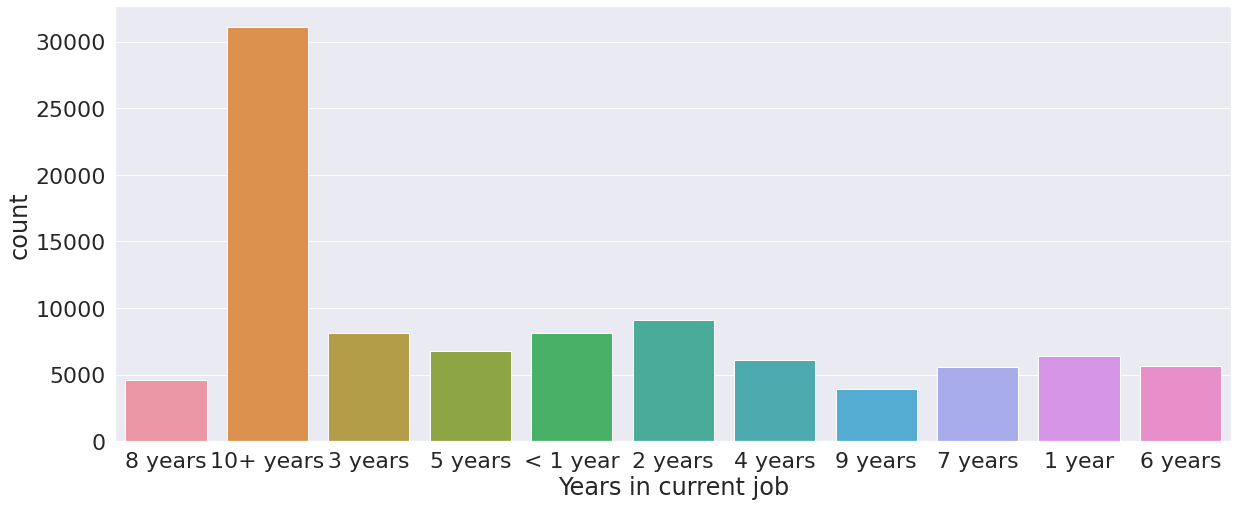

In [54]:
plt.figure(figsize=(20,8))

sns.countplot(credit['Years in current job'])

In [55]:
credit.fillna('10+ years', inplace = True)

In [56]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99794 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   99794 non-null  object 
 1   Current Loan Amount           99794 non-null  float64
 2   Term                          99794 non-null  object 
 3   Credit Score                  99794 non-null  float64
 4   Annual Income                 99794 non-null  float64
 5   Years in current job          99794 non-null  object 
 6   Home Ownership                99794 non-null  object 
 7   Purpose                       99794 non-null  object 
 8   Monthly Debt                  99794 non-null  float64
 9   Years of Credit History       99794 non-null  float64
 10  Months since last delinquent  99794 non-null  float64
 11  Number of Open Accounts       99794 non-null  float64
 12  Number of Credit Problems     99794 non-null  float64
 13  C

In [57]:
credit.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,isnull Month
count,9.979400e+04,99794.000000,9.979400e+04,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,9.979400e+04,9.979400e+04,99794.000000,99794.000000,99794.000000
mean,1.175728e+07,1076.275101,1.378339e+06,18486.117117,18.193694,16.357276,11.130910,0.168577,2.946602e+05,7.575265e+05,0.117743,0.029371,0.532497
std,3.177985e+07,1326.293914,9.719138e+05,12172.465813,7.015261,23.023429,5.007745,0.483087,3.760668e+05,8.349533e+06,0.351427,0.258433,0.498945
min,1.542200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.796960e+05,711.000000,9.312470e+05,10228.317500,13.500000,0.000000,8.000000,0.000000,1.127698e+05,2.735260e+05,0.000000,0.000000,0.000000
50%,3.124770e+05,733.000000,1.370052e+06,16237.210000,16.900000,0.000000,10.000000,0.000000,2.099120e+05,4.678740e+05,0.000000,0.000000,1.000000
75%,5.250960e+05,750.000000,1.512884e+06,24025.215000,21.700000,29.000000,14.000000,0.000000,3.680680e+05,7.828260e+05,0.000000,0.000000,1.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000,1.000000


In [58]:
credit.tail()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,isnull Month
99995,Fully Paid,147070.0,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,0.0,5.0,0.0,47766.0,658548.0,0.0,0.0,1
99996,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0,0
99997,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0,0
99998,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,0.0,8.0,0.0,404225.0,738254.0,0.0,0.0,1
99999,Fully Paid,99999999.0,Short Term,743.0,935180.0,10+ years,Own Home,Debt Consolidation,9118.10,13.0,0.0,4.0,1.0,45600.0,91014.0,1.0,0.0,1


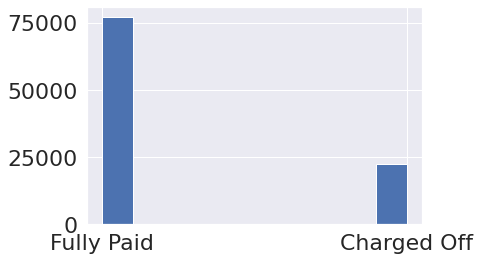

In [59]:
credit['Loan Status'].hist()

In [17]:
# y = credit['Loan Status']
# y = y.replace(['Fully Paid', 'Charged Off'], [0, 1])
# credit['Loan Status'] = y

In [18]:
# credit.corr()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,isnull Month
Loan Status,1.000000,-0.194571,0.410984,-0.046701,0.008023,-0.023650,-0.013339,0.012166,0.002347,-0.009332,-0.008215,-0.006572,0.010249,0.009718
Current Loan Amount,-0.194571,1.000000,-0.095108,0.013074,-0.006571,0.019303,-0.007122,0.001656,-0.002834,0.003992,-0.001126,-0.000611,-0.002039,0.015917
Credit Score,0.410984,-0.095108,1.000000,-0.016989,-0.001457,-0.008652,-0.008119,0.005726,-0.002785,0.000168,-0.002073,-0.006257,0.004765,0.009012
Annual Income,-0.046701,0.013074,-0.016989,1.000000,0.438551,0.144903,0.011942,0.131580,-0.015490,0.284287,0.038990,-0.043115,0.037079,-0.051747
Monthly Debt,0.008023,-0.006571,-0.001457,0.438551,1.000000,0.199743,0.005365,0.411185,-0.055744,0.481000,0.039532,-0.078977,0.020025,-0.041568
Years of Credit History,-0.023650,0.019303,-0.008652,0.144903,0.199743,1.000000,0.087150,0.132226,0.061887,0.208432,0.030742,0.066248,0.017345,-0.140232
Months since last delinquent,-0.013339,-0.007122,-0.008119,0.011942,0.005365,0.087150,1.000000,0.029163,0.081109,-0.072031,-0.010667,0.055353,0.033466,-0.758245
Number of Open Accounts,0.012166,0.001656,0.005726,0.131580,0.411185,0.132226,0.029163,1.000000,-0.014184,0.227776,0.030985,-0.024582,0.006499,-0.058456
Number of Credit Problems,0.002347,-0.002834,-0.002785,-0.015490,-0.055744,0.061887,0.081109,-0.014184,1.000000,-0.112704,-0.012011,0.752941,0.581352,-0.040085
Current Credit Balance,-0.009332,0.003992,0.000168,0.284287,0.481000,0.208432,-0.072031,0.227776,-0.112704,1.000000,0.138464,-0.122609,-0.015677,0.081133


In [60]:
# #Thay the cac truong du lieu khong phai dang so ve dang category
# category_subset = credit[['Term', 'Years in current job', 'Home Ownership', 'Purpose']]
# category_subset = pd.get_dummies(category_subset)
# credit.drop(labels = ['Term', 'Years in current job', 'Home Ownership', 'Purpose'], axis = 1, inplace = True)
# credit = pd.concat([credit, category_subset], axis = 1)
# items = ['Term', 'Years in current job', 'Home Ownership', 'Purpose']
for item in ['Term', 'Years in current job', 'Home Ownership', 'Purpose']:
    credit[item] = credit[item].astype('category')
    credit[item] = credit[item].cat.codes
credit.head(5)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,isnull Month
0,Fully Paid,445412.0,1,709.000000,1.167493e+06,8,1,5,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0,1
1,Fully Paid,262328.0,1,1076.275101,1.378339e+06,1,1,3,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0
2,Fully Paid,99999999.0,1,741.000000,2.231892e+06,8,2,3,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0
3,Fully Paid,347666.0,0,721.000000,8.069490e+05,3,2,3,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1
4,Fully Paid,176220.0,1,1076.275101,1.378339e+06,5,3,3,20639.70,6.1,0.0,15.0,0.0,253460.0,427174.0,0.0,0.0,1


In [61]:
def remove_collinear_features(x, threshold):
    y = x['Loan Status']
    x = x.drop(columns = ['Loan Status'])

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)

    # Add the score back in to the data
    x['Loan Status'] = y

    return x

#corr độ tương đồng tuyến tính, kì vọng (X - uX)(Y - uY) chia cho độ lệch chuẩn của X, Y

In [62]:
# credit = remove_collinear_features(credit, 0.6);
# print(credit.shape)

In [67]:
y = credit['Loan Status']
X = credit.drop(columns = 'Loan Status')
X.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,isnull Month
0,445412.0,1,709.000000,1.167493e+06,8,1,5,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0,1
1,262328.0,1,1076.275101,1.378339e+06,1,1,3,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0
2,99999999.0,1,741.000000,2.231892e+06,8,2,3,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0
3,347666.0,0,721.000000,8.069490e+05,3,2,3,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1
4,176220.0,1,1076.275101,1.378339e+06,5,3,3,20639.70,6.1,0.0,15.0,0.0,253460.0,427174.0,0.0,0.0,1


In [69]:
credit_score = X['Credit Score']
X = X.drop(columns = 'Credit Score')
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf['Credit Score'] = credit_score
X = principalDf

In [65]:
X.head()

,principal component 1,principal component 2,Credit Score
0,-1.131184e+07,-345729.022263,709.000000
1,-1.149498e+07,89223.255750,1076.275101
2,8.824305e+07,24369.810279,741.000000
3,-1.140972e+07,-377033.494799,721.000000
4,-1.158095e+07,-334254.930450,1076.275101


In [68]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN

ros = RandomOverSampler(random_state=0)
X_random, y_random = ros.fit_resample(X, y)

X_smote, y_smote = SMOTE().fit_resample(X, y)

X_adasyn, y_adasyn = ADASYN().fit_resample(X, y)

/home/manhas/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/home/manhas/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/home/manhas/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


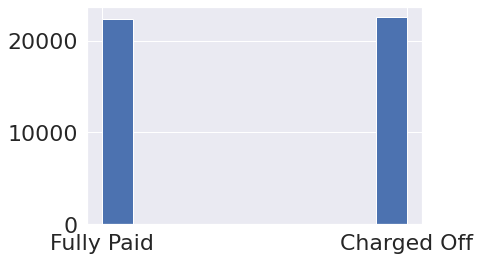

In [70]:
X['Loan Status'] = y
mean, std = X['Credit Score'].mean(), X['Credit Score'].std()
threshold = 0.25
up = mean + threshold*std
down = mean - threshold*std
X = X[((X['Credit Score'] > down) & (X['Credit Score'] < up) & (X['Loan Status'] == "Fully Paid")) |
      (X['Loan Status'] == 'Charged Off')]
X['Loan Status'].hist()

y = X['Loan Status']
X = X.drop(columns = 'Loan Status')

In [75]:
from sklearn.preprocessing import StandardScaler

from sklearn.tree import plot_tree

sc = StandardScaler()
X = sc.fit_transform(X)
X_random = sc.fit_transform(X_random)
X_smote = sc.fit_transform(X_smote)
X_adasyn = sc.fit_transform(X_adasyn)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y_random = labelencoder_y.fit_transform(y_random)
y_smote = labelencoder_y.fit_transform(y_smote)
y_adasyn = labelencoder_y.fit_transform(y_adasyn)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(X_random, y_random, test_size = 0.3, random_state = 42)

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size = 0.3, random_state = 42)

X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size = 0.3, random_state = 42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_leaf_nodes = 200)
clf.fit(X_train, y_train)
pred_labels = clf.predict(X_test)
print("Undersampling")
print('Accuracy score:  ', accuracy_score(y_test, pred_labels))
print('Precision score: ', precision_score(y_test, pred_labels, average = None))
print('Recall score:    ', recall_score(y_test, pred_labels, average = None))
print('F1 score:    ', f1_score(y_test, pred_labels, average = None))

# print("\nOver Random")
# clf.fit(X_train_rand, y_train_rand)
# pred_labels = clf.predict(X_test_rand)
# print('Accuracy score:  ', accuracy_score(y_test_rand, pred_labels))
# print('Precision score: ', precision_score(y_test_rand, pred_labels, average = None))
# print('Recall score:    ', recall_score(y_test_rand, pred_labels, average = None))
# print('F1 score:    ', f1_score(y_test_rand, pred_labels, average = None))

print("\nOver Smote")
clf.fit(X_train_smote, y_train_smote)
pred_labels = clf.predict(X_test_smote)
print('Accuracy score:  ', accuracy_score(y_test_smote, pred_labels))
print('Precision score: ', precision_score(y_test_smote, pred_labels, average = None))
print('Recall score:    ', recall_score(y_test_smote, pred_labels, average = None))
print('F1 score:    ', f1_score(y_test_smote, pred_labels, average = None))

print("\nOver Adasyn")
clf.fit(X_train_adasyn, y_train_adasyn)
pred_labels = clf.predict(X_test_adasyn)
print('Accuracy score:  ', accuracy_score(y_test_adasyn, pred_labels))
print('Precision score: ', precision_score(y_test_adasyn, pred_labels, average = None))
print('Recall score:    ', recall_score(y_test_adasyn, pred_labels, average = None))
print('F1 score:    ', f1_score(y_test_adasyn, pred_labels, average = None))

print("\nKhong su dung max node leaf:\n")

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf.fit(X_train, y_train)
pred_labels = clf.predict(X_test)
print("Undersampling")
print('Accuracy score:  ', accuracy_score(y_test, pred_labels))
print('Precision score: ', precision_score(y_test, pred_labels, average = None))
print('Recall score:    ', recall_score(y_test, pred_labels, average = None))
print('F1 score:    ', f1_score(y_test, pred_labels, average = None))

# print("\nOver Random")
# clf.fit(X_train_rand, y_train_rand)
# pred_labels = clf.predict(X_test_rand)
# print('Accuracy score:  ', accuracy_score(y_test_rand, pred_labels))
# print('Precision score: ', precision_score(y_test_rand, pred_labels, average = None))
# print('Recall score:    ', recall_score(y_test_rand, pred_labels, average = None))
# print('F1 score:    ', f1_score(y_test_rand, pred_labels, average = None))

print("\nOver Smote")
clf.fit(X_train_smote, y_train_smote)
pred_labels = clf.predict(X_test_smote)
print('Accuracy score:  ', accuracy_score(y_test_smote, pred_labels))
print('Precision score: ', precision_score(y_test_smote, pred_labels, average = None))
print('Recall score:    ', recall_score(y_test_smote, pred_labels, average = None))
print('F1 score:    ', f1_score(y_test_smote, pred_labels, average = None))

print("\nOver Adasyn")
clf.fit(X_train_adasyn, y_train_adasyn)
pred_labels = clf.predict(X_test_adasyn)
print('Accuracy score:  ', accuracy_score(y_test_adasyn, pred_labels))
print('Precision score: ', precision_score(y_test_adasyn, pred_labels, average = None))
print('Recall score:    ', recall_score(y_test_adasyn, pred_labels, average = None))
print('F1 score:    ', f1_score(y_test_adasyn, pred_labels, average = None))


Undersampling
Accuracy score:   0.8532947462154942
Precision score:  [0.97734109 0.78042172]
Recall score:     [0.72336005 0.98322944]
F1 score:     [0.83138593 0.87016484]

Over Smote
Accuracy score:   0.8450080949811117
Precision score:  [0.95259492 0.7778479 ]
Recall score:     [0.72802198 0.96335056]
F1 score:     [0.82530414 0.86071775]

Over Adasyn
Accuracy score:   0.848672432758881
Precision score:  [0.97102201 0.77545251]
Recall score:     [0.72128552 0.97812568]
F1 score:     [0.82772676 0.86507692]

Khong su dung max node leaf:

Undersampling
Accuracy score:   0.7930394775897892
Precision score:  [0.79066686 0.79545114]
Recall score:     [0.79712081 0.78895815]
F1 score:     [0.79388072 0.79219134]

Over Smote
Accuracy score:   0.824932541824069
Precision score:  [0.82987227 0.82005406]
Recall score:     [0.81996909 0.82995354]
F1 score:     [0.82489096 0.8249741 ]

Over Adasyn
Accuracy score:   0.8272544917283179
Precision score:  [0.83335504 0.82122953]
Recall score:     [

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
a = plot_tree(clf, 
              feature_names=breast_cancer.feature_names, 
              class_names=breast_cancer.target_names, 
              filled=True, 
              rounded=True, 
              fontsize=14)